# BENG 212 HW 5

##  Office Hours Discussion

### 3/3/2020

#### Resources
- An interesting read comparing statistics to ML: https://www.nature.com/articles/nmeth.4642 

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.metrics import precision_recall_curve


data = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Expression Data', index_col = 0)
metadata = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Experimental Conditions', index_col = 0)
gene_info = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Gene Information', index_col = 0)

## Problem 1: Supervised learning methods

### A. Train a binary classifier to distinguish between the strains MG1655 and BW25113 for  the following two models.

#### A.i. Logistic Regression

In [2]:
import random

from sklearn.linear_model import LogisticRegression

Note: below, I narrow the strains down such that no KO strains are included. Feel free to include the KOs -- this may produce a more interesting analysis (as discussed in OH).

In [3]:
MG_samples = metadata.index[metadata['Strain Description'] == 'Escherichia coli K-12 MG1655']
BW_samples = metadata.index[metadata['Strain Description'] == 'Escherichia coli BW25113']

all_samples = MG_samples.append(BW_samples)

train_mg = random.sample(set(MG_samples), 31)
test_mg = list(set(MG_samples) - set(train_mg))

train_bw = random.sample(set(BW_samples), 6)
test_bw = list(set(BW_samples) - set(train_bw))

train_samples = train_mg + train_bw
test_samples = test_mg + test_bw

train_labels = (metadata.loc[train_samples, 'Strain Description'] == 'Escherichia coli BW25113')
test_labels = (metadata.loc[test_samples, 'Strain Description'] == 'Escherichia coli BW25113')

lr = LogisticRegression('l1')

lr = lr.fit(data.loc[:, train_samples].T, train_labels)

p = lr.score(data.loc[:, test_samples].T, test_labels)


len(lr.coef_[0])

#### A.ii. Support Vector Machines

In [4]:
#getting all sample index, this contains all our samples (49 in total)
all_samples

Index(['base__wt_glc__1', 'base__wt_glc__2', 'fur__wt_dpd__1',
       'fur__wt_dpd__2', 'fur__wt_fe__1', 'fur__wt_fe__2', 'acid__wt_ph5__1',
       'acid__wt_ph5__2', 'oxidative__wt_pq__1', 'oxidative__wt_pq__2',
       'nac_ntrc__wt_csn__1', 'nac_ntrc__wt_csn__2', 'nac_ntrc__wt_cytd__1',
       'nac_ntrc__wt_cytd__2', 'nac_ntrc__wt_gln__1', 'nac_ntrc__wt_gln__2',
       'misc__wt_no_te__1', 'misc__wt_no_te__2', 'omics__wt_glu__1',
       'omics__wt_glu__2', 'omics__wt_gly__1', 'omics__wt_gly__2',
       'omics__wt_thr__1', 'omics__wt_thr__2', 'ompr__wt_nacl__1',
       'minspan__wt_ade__1', 'minspan__wt_glc__1', 'minspan__wt_glc__2',
       'minspan__wt_glc__3', 'minspan__wt_glc__4', 'minspan__wt_glc_anaero__1',
       'minspan__wt_glc_anaero__2', 'minspan__wt_trp__1', 'cra_crp__wt_ac__1',
       'cra_crp__wt_ac__2', 'cra_crp__wt_fru__1', 'cra_crp__wt_fru__2',
       'rpoB__wt_031__1', 'rpoB__wt_044__1', 'rpoB__wt_lb__1',
       'rpoB__wt_lb__2', 'omics__bw_ac__1', 'omics__bw_ac__2',


In [5]:
#Transposing data so that its possible to use index to call the rows.
data_T=data.T
data_T
#data_x=data.loc[all_samples]

,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,...,b4660_1,b4661,b4662,b4676,b4686,b4688,b4693,b4696_1,b4696_2,b4705
base__wt_glc__1,7.629317,7.219668,7.343891,4.378073,4.793733,2.440565,7.754150,4.271038,3.744352,1.158857,...,0.836431,2.323626,2.342064,1.981385,2.705187,1.714338,0.602324,1.834487,2.138244,4.292478
base__wt_glc__2,7.714938,7.294158,7.434121,4.338134,4.781124,2.431139,7.773590,4.349795,3.745538,1.613532,...,0.956941,1.915753,2.104705,1.756324,0.000000,1.731933,0.988983,1.764432,2.182114,3.288338
fur__wt_dpd__1,8.113347,7.918491,7.248520,3.758424,4.696611,2.524034,7.663381,4.411558,2.969860,2.082519,...,0.637398,2.682893,0.762845,0.000000,0.000000,0.553218,1.739311,2.607990,2.704712,0.775085
fur__wt_dpd__2,8.240386,8.181859,7.471647,3.698816,4.701444,2.425175,7.485217,4.387835,2.861103,1.693433,...,0.657211,2.564034,0.000000,0.000000,0.000000,0.571096,1.502915,2.522697,2.771110,0.797724
fur__wt_fe__1,7.669640,7.470134,7.205343,4.655322,4.687029,2.281824,7.595845,4.128589,3.375642,1.370066,...,0.694989,2.068136,1.706391,1.704343,2.200745,1.680226,1.217188,1.431101,1.829371,3.272305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rpoB__rpoBE546V_glc__1,7.574388,7.134694,7.102728,5.234553,4.770893,2.207381,7.609320,4.648471,3.704643,2.012574,...,0.979187,1.928403,2.913703,2.030968,3.674480,2.201190,1.566954,1.665117,1.668196,3.790853
rpoB__rpoBE672K_glc__1,7.625299,7.374954,7.538778,4.862053,4.823452,2.094235,7.599969,4.488469,3.154256,1.937444,...,0.537037,1.865039,0.000000,0.000000,0.000000,1.633951,0.915099,1.350598,2.146426,0.000000
rpoB__rpoBE672K_glc__2,7.624386,7.374000,7.542841,4.865263,4.901313,1.928521,7.618505,4.864811,3.660475,1.086039,...,1.084189,2.043130,0.000000,0.000000,0.000000,0.000000,1.244903,1.077656,2.160819,0.000000
rpoB__rpoBE672K_lb__1,5.640107,5.369193,5.402317,2.510686,4.785283,2.197745,8.008583,5.240394,3.342985,1.342639,...,0.447406,1.572979,0.000000,0.000000,0.000000,0.000000,1.378863,1.612560,1.326335,0.000000


In [6]:
#calling all index rows, still as dataframes. 
data_x=data_T.loc[all_samples]
data_x #49 rows × 3887 columns

,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,...,b4660_1,b4661,b4662,b4676,b4686,b4688,b4693,b4696_1,b4696_2,b4705
Sample ID,,,,,,,,,,,,,,,,,,,,,
base__wt_glc__1,7.629317,7.219668,7.343891,4.378073,4.793733,2.440565,7.754150,4.271038,3.744352,1.158857,...,0.836431,2.323626,2.342064,1.981385,2.705187,1.714338,0.602324,1.834487,2.138244,4.292478
base__wt_glc__2,7.714938,7.294158,7.434121,4.338134,4.781124,2.431139,7.773590,4.349795,3.745538,1.613532,...,0.956941,1.915753,2.104705,1.756324,0.000000,1.731933,0.988983,1.764432,2.182114,3.288338
fur__wt_dpd__1,8.113347,7.918491,7.248520,3.758424,4.696611,2.524034,7.663381,4.411558,2.969860,2.082519,...,0.637398,2.682893,0.762845,0.000000,0.000000,0.553218,1.739311,2.607990,2.704712,0.775085
fur__wt_dpd__2,8.240386,8.181859,7.471647,3.698816,4.701444,2.425175,7.485217,4.387835,2.861103,1.693433,...,0.657211,2.564034,0.000000,0.000000,0.000000,0.571096,1.502915,2.522697,2.771110,0.797724
fur__wt_fe__1,7.669640,7.470134,7.205343,4.655322,4.687029,2.281824,7.595845,4.128589,3.375642,1.370066,...,0.694989,2.068136,1.706391,1.704343,2.200745,1.680226,1.217188,1.431101,1.829371,3.272305
fur__wt_fe__2,7.471594,7.345953,7.010567,4.443782,4.724970,2.412122,7.592305,4.192086,3.390945,1.165004,...,0.631226,2.004457,1.599992,2.443647,2.340686,1.482264,1.480901,1.396323,1.525206,2.919118
acid__wt_ph5__1,7.589609,7.456002,7.127060,3.660626,4.793472,2.489857,7.730419,4.382875,3.353632,1.683830,...,0.945697,2.272959,1.211335,0.000000,0.875486,1.569852,1.076419,1.893664,2.270840,1.762118
acid__wt_ph5__2,7.595755,7.508355,7.073073,3.690683,4.842865,2.332901,7.700252,4.414908,3.240443,1.488026,...,0.705883,2.169706,1.195080,0.929026,0.000000,0.556015,1.271066,2.020950,2.261018,0.778634
oxidative__wt_pq__1,5.523226,5.682987,5.285199,2.777635,5.146445,2.832663,7.376142,4.009826,2.866643,2.330061,...,0.306137,2.634457,0.000000,0.000000,0.000000,0.000000,1.775348,2.705656,2.929156,0.973124


In [7]:
#df to numpy array only values for making the final X (data array)
x=data_x.to_numpy()
x

array([[7.62931651, 7.21966763, 7.34389137, ..., 1.83448738, 2.13824363,
        4.29247805],
       [7.71493807, 7.29415762, 7.43412073, ..., 1.76443189, 2.18211406,
        3.28833842],
       [8.11334677, 7.91849147, 7.24851983, ..., 2.60799012, 2.70471216,
        0.77508473],
       ...,
       [7.08139856, 6.70680849, 6.84018705, ..., 2.24897222, 2.24897222,
        2.60775485],
       [7.42199145, 7.07415867, 7.14034673, ..., 2.54800172, 2.54800172,
        2.84598221],
       [7.41302878, 7.05573069, 7.23819263, ..., 2.52947667, 2.52947667,
        2.33656928]])

In [8]:
all_samples

Index(['base__wt_glc__1', 'base__wt_glc__2', 'fur__wt_dpd__1',
       'fur__wt_dpd__2', 'fur__wt_fe__1', 'fur__wt_fe__2', 'acid__wt_ph5__1',
       'acid__wt_ph5__2', 'oxidative__wt_pq__1', 'oxidative__wt_pq__2',
       'nac_ntrc__wt_csn__1', 'nac_ntrc__wt_csn__2', 'nac_ntrc__wt_cytd__1',
       'nac_ntrc__wt_cytd__2', 'nac_ntrc__wt_gln__1', 'nac_ntrc__wt_gln__2',
       'misc__wt_no_te__1', 'misc__wt_no_te__2', 'omics__wt_glu__1',
       'omics__wt_glu__2', 'omics__wt_gly__1', 'omics__wt_gly__2',
       'omics__wt_thr__1', 'omics__wt_thr__2', 'ompr__wt_nacl__1',
       'minspan__wt_ade__1', 'minspan__wt_glc__1', 'minspan__wt_glc__2',
       'minspan__wt_glc__3', 'minspan__wt_glc__4', 'minspan__wt_glc_anaero__1',
       'minspan__wt_glc_anaero__2', 'minspan__wt_trp__1', 'cra_crp__wt_ac__1',
       'cra_crp__wt_ac__2', 'cra_crp__wt_fru__1', 'cra_crp__wt_fru__2',
       'rpoB__wt_031__1', 'rpoB__wt_044__1', 'rpoB__wt_lb__1',
       'rpoB__wt_lb__2', 'omics__bw_ac__1', 'omics__bw_ac__2',


In [9]:
#Assigning 0 or 1 to samples for forming target Y array. 
#getting a false/true output if strain is BW25113
T_F = (metadata.loc[all_samples, 'Strain Description'] == 'Escherichia coli BW25113')
len(T_F)
T_F

Sample ID
base__wt_glc__1              False
base__wt_glc__2              False
fur__wt_dpd__1               False
fur__wt_dpd__2               False
fur__wt_fe__1                False
fur__wt_fe__2                False
acid__wt_ph5__1              False
acid__wt_ph5__2              False
oxidative__wt_pq__1          False
oxidative__wt_pq__2          False
nac_ntrc__wt_csn__1          False
nac_ntrc__wt_csn__2          False
nac_ntrc__wt_cytd__1         False
nac_ntrc__wt_cytd__2         False
nac_ntrc__wt_gln__1          False
nac_ntrc__wt_gln__2          False
misc__wt_no_te__1            False
misc__wt_no_te__2            False
omics__wt_glu__1             False
omics__wt_glu__2             False
omics__wt_gly__1             False
omics__wt_gly__2             False
omics__wt_thr__1             False
omics__wt_thr__2             False
ompr__wt_nacl__1             False
minspan__wt_ade__1           False
minspan__wt_glc__1           False
minspan__wt_glc__2           False
minspan__w

In [10]:
#converting tupule to list. 
a=list(T_F)
#replacing all False with 0 for MG strain
# True, BW= 1 
[1 if x==True else 0 for x in a]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [11]:
#converting list to numpy
Y=np.asarray(a)
target_Y=np.where(Y==False, 0, Y)
target_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1])

In [12]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [13]:
#using only 48 samples for training data.
clf.fit(x[:-1], target_Y[:-1])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
#Predicting which class the data belongs to. 0=MG, 1=BW strains. 
clf.predict(x[-1:])

array([1])

WORKING!!!! 
final lr , Logisitic regression below with labels same as above. 



#calling all index rows, still as dataframes. 
data_x=data_T.loc[all_samples]
data_x #49 rows × 3887 columns

X_train, X_test, y_train, y_test = train_test_split(data_x,target_Y,test_size=0.4, random_state=10)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR Score =  1.0


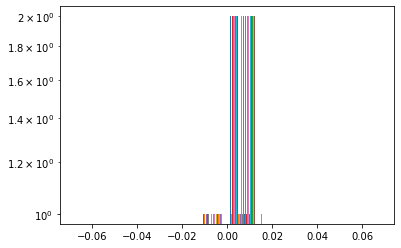

In [243]:
#QS_1.a
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=lr.fit(X_train,y_train)
pp=lr.predict_proba(X_test)

#QS 1.b
print('LR Score = ', lr.score(X_test,y_test))
importance = lr.coef_[0]
importance = pd.DataFrame(importance, index = data.index, columns = ['weight'])
importance['abs_val'] = importance.weight.abs()
top5_lr = importance.sort_values('abs_val', ascending = False).iloc[0:5, :]
gene_info.loc[top5_lr.index]
plt.hist(importance)
plt.yscale('log')

### B. Interpret your models in terms of performance and influential variables.

In [408]:
pp

array([[9.97855011e-01, 2.14498857e-03],
       [9.99879429e-01, 1.20570793e-04],
       [1.53540501e-03, 9.98464595e-01],
       [1.01403328e-02, 9.89859667e-01],
       [1.81706801e-02, 9.81829320e-01],
       [9.99720320e-01, 2.79680497e-04],
       [9.99810283e-01, 1.89716733e-04],
       [9.93141723e-01, 6.85827750e-03],
       [9.99475620e-01, 5.24379878e-04],
       [9.99530679e-01, 4.69321458e-04],
       [9.99726885e-01, 2.73115374e-04],
       [9.99787838e-01, 2.12161553e-04],
       [9.99212849e-01, 7.87151493e-04],
       [9.92743888e-01, 7.25611196e-03],
       [9.99046954e-01, 9.53045723e-04],
       [9.99773526e-01, 2.26474243e-04],
       [9.99709579e-01, 2.90420864e-04],
       [9.99103950e-01, 8.96050481e-04],
       [9.99903237e-01, 9.67626213e-05],
       [9.95615476e-01, 4.38452390e-03],
       [9.98156997e-01, 1.84300282e-03],
       [9.99705607e-01, 2.94392556e-04],
       [9.97680235e-01, 2.31976501e-03],
       [1.41211931e-03, 9.98587881e-01],
       [9.993412

lr = LogisticRegression('elasticnet', l1_ratio = 0.5, solver = 'saga')

lr = lr.fit(data.loc[:, train_samples].T, train_labels)

importance = lr.coef_[0]

importance = pd.DataFrame(importance, index = data.index, columns = ['weight'])

importance['abs_val'] = importance.weight.abs()

top5_lr = importance.sort_values('abs_val', ascending = False).iloc[0:5, :]

gene_info.loc[top5_lr.index]

SVM evaluation




([array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 2., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 2., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 2.

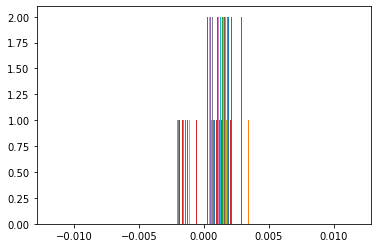

In [242]:
#Working!!! Top 5 genes for SVM classes. 

#have to change SVM to linear model for using this function. 
clf.coef_.shape #(1,3887)
imp2 = pd.DataFrame(clf.coef_.T, index = data.index, columns = ['weight'])
imp2['abs_val'] = imp2.weight.abs()
top5_lr = imp2.sort_values('abs_val', ascending = False).iloc[0:5, :]
gene_info.loc[top5_lr.index]
plt.hist(imp2)


### C. Train a regression model to predict expression of rpoB (b3987) from the expression of all other genes, for each of the following approaches. Repeat the analysis in part b.

#### C.i. Simple linear regression


rpob = data.loc['b3987']

no_rpob = data.drop('b3987')

train_samples = random.sample(list(data.columns), 75)
test_samples = list(set(data.columns) - set(train_samples))

train_no_rpob = no_rpob[train_samples]
test_no_rpob = no_rpob[test_samples]

In [349]:
#WORKING!!!!!! Final Lin_reg simple linear regression 
rpob = data.loc['b3987']
no_rpob = data.drop('b3987')

#transpose no_rpob to give (102,3886)
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(no_rpob.T, rpob, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()  
Lin_reg.fit(X_train, y_train)
y_pred = Lin_reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

imp3 = Lin_reg.coef_

imp3 = pd.DataFrame(imp3, index = no_rpob.index, columns = ['weight'])

importance['abs_val'] = imp3.weight.abs()

top5_lr = importance.sort_values('abs_val', ascending = False).iloc[0:5, :]

gene_info.loc[top5_lr.index]

,start,stop,strand,gene_name,length,operon,cog
b0572,595599,596973,+,cusC,1374,cusCFBA,Cell wall/membrane/envelope biogenesis
b3993,4193568,4194204,-,thiE,636,thiCEFSGH,Coenzyme transport and metabolism
b4705,852868,852997,-,mntS,129,rybA-mntS,No COG Annotation
b3992,4192820,4193576,-,thiF,756,thiCEFSGH,No COG Annotation
b3994,4194203,4196099,-,thiC,1896,thiCEFSGH,Coenzyme transport and metabolism


'''
expvar_DF = dataframe with alpha as the rows, L1_ratio as the columns, and a computed performance metric as each elt

sns.heatmap(expvar_DF, annot=True, vmin = 0, vmax = 1, ax = ax[0])
ax[0].set_ylabel('alpha')
ax[0].set_xlabel('l1 ratio')
ax[0].set_title('Explained Variance of Elastic Net Regression')
'''

In [355]:
# using elasticnet
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
y_pred_enet
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_enet})
df2

from sklearn.metrics import r2_score
r2_score_enet = r2_score(y_test, y_pred_enet)



#imp3 = Lin_reg.coef_

#imp3 = pd.DataFrame(imp3, index = no_rpob.index, columns = ['weight'])

#importance['abs_val'] = imp3.weight.abs()

#top5_lr = importance.sort_values('abs_val', ascending = False).iloc[0:5, :]

#gene_info.loc[top5_lr.index]




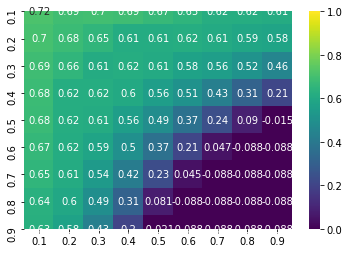

In [407]:
#working heat map 
r2=[]
a_L1=[]
for i in range(1,10):
    a_L1.append(i/10)
    #print (i/10)
    #enet = ElasticNet(alpha=i/10, l1_ratio=j)

    for j in range (1,10):
            enet = ElasticNet(alpha=i/10, l1_ratio=j/10)
            y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
            #print('i,j', i, j)
            y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
            r2_score_enet = r2_score(y_test, y_pred_enet)
            r2.append(r2_score_enet)
    
#print (r2)
#print(a_L1)
matrix=np.asarray(r2).reshape(9,9)
matrix.shape
r2_df=pd.DataFrame(matrix,index=a_L1, columns =a_L1)
sns.heatmap(r2_df, annot=True,vmin=0,vmax=1, cmap='viridis')
plt.show()

In [400]:
matrix=np.asarray(r2).reshape(9,9)
matrix.shape


(9, 9)

In [402]:
r2_df=pd.DataFrame(matrix,index=a_L1, columns =a_L1)
r2_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0.1,0.717900,0.693958,0.696869,0.688632,0.671519,0.651885,0.622168,0.617760,0.610160
0.2,0.704092,0.681219,0.652887,0.613293,0.614595,0.617870,0.608705,0.589982,0.582491
0.3,0.689435,0.655236,0.612623,0.620333,0.608365,0.577822,0.555170,0.515169,0.455550
0.4,0.683582,0.619024,0.620363,0.603568,0.558541,0.509312,0.427503,0.314920,0.214652
0.5,0.676352,0.617645,0.611483,0.557229,0.486933,0.372724,0.239062,0.089630,-0.015101
0.6,0.666432,0.616246,0.585028,0.499102,0.370177,0.208468,0.047463,-0.087996,-0.087996
0.7,0.653203,0.611383,0.542367,0.416662,0.232506,0.044619,-0.087996,-0.087996,-0.087996
0.8,0.636107,0.596691,0.490901,0.310055,0.081193,-0.087996,-0.087996,-0.087996,-0.087996
0.9,0.629052,0.575480,0.431155,0.199554,-0.021344,-0.087996,-0.087996,-0.087996,-0.087996


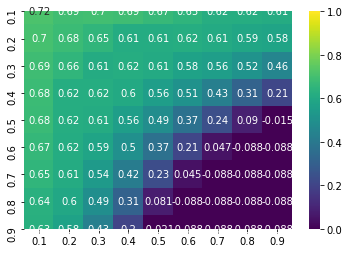

In [406]:
sns.heatmap(r2_df, annot=True,vmin=0,vmax=1, cmap='viridis')
plt.show()

In [393]:
len(r2)

81

In [ ]:
regressor.coef_.shape

In [267]:
print('train_no_rpob.shape',train_no_rpob.shape)
print('test_no_rpob.shape',test_no_rpob.shape)
print('no_rpob  ',no_rpob.shape)
print('rpob  ',rpob.shape)


train_no_rpob.shape (3886, 75)
test_no_rpob.shape (3886, 27)
no_rpob   (3886, 102)
rpob   (102,)


#### C.ii. Regression trees (be sure to set a reasonable depth which is slightly less than the automatically selected maximum depth in order to prevent overfitting)

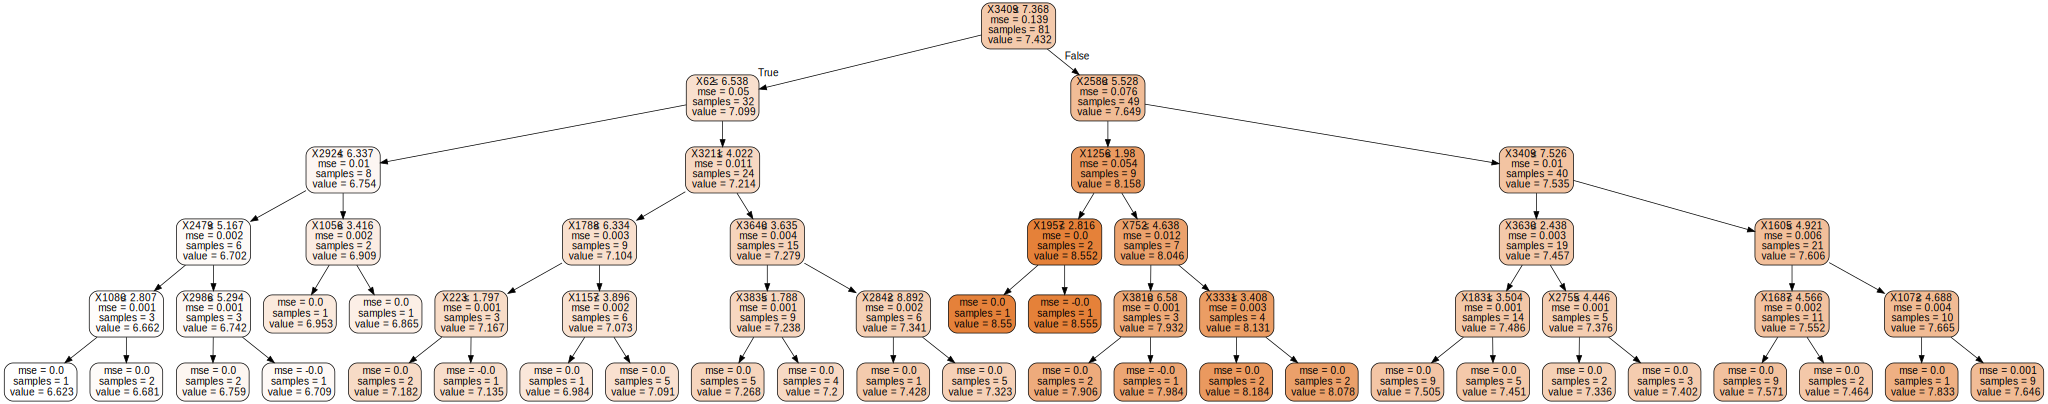

In [343]:
#Working final regression tree, max depth =4,5 seems to be accurate. shld I get score? 
from sklearn import tree
clf_tree = tree.DecisionTreeRegressor(max_depth=5)
clf_tree = clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(df)

#need to install in cmd as : conda install -c anaconda python-graphviz
import graphviz 
dot_data = tree.export_graphviz(clf_tree, out_file=None,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data) 
graph = graphviz.Source(dot_data)  
graph 

In [315]:
#print("Accuracy", metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import accuracy_score

score = accuracy_score(X_test.values, y_pred)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets

In [318]:
y_pred

array([7.50522728, 7.98405959, 7.64584384, 6.68137771, 7.98405959,
       7.0911022 , 7.33609395, 7.50522728, 6.68137771, 7.19986929,
       6.95264129, 7.33609395, 7.19986929, 7.19986929, 7.83268411,
       7.50522728, 7.57149668, 7.64584384, 7.57149668, 7.32325185,
       7.64584384])

In [314]:
print(clf.tree_.max_depth)


10


In [16]:
reg_tree.tree_.max_depth # gives the maximum depth of the tree 

NameError: name 'reg_tree' is not defined

In [329]:
#working score
from sklearn.model_selection import cross_val_score
score = regressor.score(X_test, y_test)
print (score)

0.8922372600519558


In [333]:
>>> from sklearn.model_selection import cross_val_score
>>> cross_val_score(regressor, X_test, y_test, cv=10)


array([-9.59829089e-02,  9.97371095e-01,  3.61524705e-01,  9.93683478e-01,
       -8.95130836e-01, -1.94645515e+00,  6.55666697e-01, -5.58407201e-01,
       -1.91315580e+06, -6.50956894e-02])

## 2. Regularization

### A. Discuss the following types of regularization.

#### A.i. L1 and L2 penalties

Linear regression models assume linear relationship between output and input as y1 = a1x1 + a2x2 + ....
A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. Regularization adds penalties to more complex models and then sorts potential models from least overfit to greatest; The model with the lowest “overfitting” score is usually the best choice for predictive power.
A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. And Elastic Net uses both L1+L2 penalties. Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. However, if lambda is very large then it will add too much weight and it will lead to under-fitting.  Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.The main difference between L1 and L2 regularization is that L1 can yield sparse models while L2 doesn't. Sparse model is a great property to have when dealing with high-dimensional data, for at least 2 reasons. Feature selection: it helps to know which features are important and which features are not or redundant.

#### A.ii. Boosting, bagging, and pruning trees

Boosting:
Boosting is a numerical optimization technique for minimizing the loss function by adding, at each step, a new tree that best reduces (steps down the gradient of) the loss function. For BRT, the first regression tree is the one that, for the selected tree size, maximally reduces the loss function.The boosted trees model is very good at handling tabular data with numerical features, or categorical features with fewer than hundreds of categories. Unlike linear models, the boosted trees model are able to capture non-linear interaction between the features and the target.However, the tree based models are not designed to work with very sparse features.

Bagging:
Bootstrap aggregation or bagging is a general-purpose procedure for reducing the variance of a statistical learning method.Averaging a set of observations reduces variance.One natural way to reduce the variance and hence increase theprediction accuracy of a statistical learning method is to take many training sets from the population and build a separate prediction model using each training set. Then we average the resulting
predictions.

Pruning trees: 
Regression tree pruning reduces the risk of overfitting by verifying the predictive utility of all nodes of a regression tree. Nodes that do not improve the expected prediction quality on new data are replaces by leaves.Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

#### A.iii. Early stopping

An alternative method to prevent overfitting is to try and stop the tree-building process early, before it produces leaves with very small samples. This heuristic is known as early stopping but is also sometimes known as pre-pruning decision trees. At each stage of splitting the tree, we check the cross-validation error. If the error does not decrease significantly enough then we stop. Early stopping may underfit by stopping too early. The current split may be of little benefit, but having made it, subsequent splits more significantly reduce the error.Early stopping and pruning can be used together, separately, or not at all.  Post pruning decision trees is more mathematically rigorous, finding a tree at least as good as early stopping. Early stopping is a quick fix heuristic.

### B. Implement elastic net regression for the linear regression in part 1c. Vary L1 and L2 weights and evaluate the performance of the model.

## 3. Model Assessment

### A. Construct PR and ROC curves for the SVM model you generated in problem 1a. 

ROC

In [17]:
# use predict_proba()
# may be useful to also output a histogram

In [18]:
#clf.fit(x[:-1], target_Y[:-1])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,target_Y,test_size=0.33, random_state=44)
len(y_train)

32

y_pred  [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
y_test [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
y_train [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0]


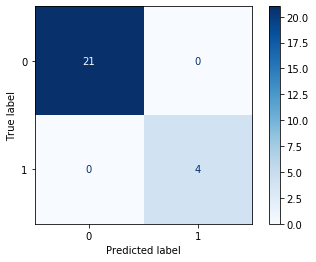

In [410]:
# Final SVM +Confusion matrix values. 
X_train, X_test, y_train, y_test = train_test_split(x,target_Y,test_size=0.5, random_state=10)
clf = svm.SVC(gamma=0.001,kernel='linear', C=100.,probability=True,).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('y_pred ' , y_pred)
print('y_test', y_test)
print('y_train',y_train)
confusion_matrix(y_test, y_pred,labels=[0,1])
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)


In [411]:
pp

array([[9.97855011e-01, 2.14498857e-03],
       [9.99879429e-01, 1.20570793e-04],
       [1.53540501e-03, 9.98464595e-01],
       [1.01403328e-02, 9.89859667e-01],
       [1.81706801e-02, 9.81829320e-01],
       [9.99720320e-01, 2.79680497e-04],
       [9.99810283e-01, 1.89716733e-04],
       [9.93141723e-01, 6.85827750e-03],
       [9.99475620e-01, 5.24379878e-04],
       [9.99530679e-01, 4.69321458e-04],
       [9.99726885e-01, 2.73115374e-04],
       [9.99787838e-01, 2.12161553e-04],
       [9.99212849e-01, 7.87151493e-04],
       [9.92743888e-01, 7.25611196e-03],
       [9.99046954e-01, 9.53045723e-04],
       [9.99773526e-01, 2.26474243e-04],
       [9.99709579e-01, 2.90420864e-04],
       [9.99103950e-01, 8.96050481e-04],
       [9.99903237e-01, 9.67626213e-05],
       [9.95615476e-01, 4.38452390e-03],
       [9.98156997e-01, 1.84300282e-03],
       [9.99705607e-01, 2.94392556e-04],
       [9.97680235e-01, 2.31976501e-03],
       [1.41211931e-03, 9.98587881e-01],
       [9.993412

In [229]:
clf.coef_

array([[-0.00095149, -0.00075486, -0.00066243, ...,  0.00125647,
         0.00049331, -0.00563116]])

In [21]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.88235294, 0.        ])

PR curve below, then ROC

In [91]:
y_score = clf.predict_proba(X_test)
print(len(y_score))
print(len(X_test))
print(len(y_test))
print(y_score.shape)
print(y_test.shape)

AttributeError: predict_proba is not available when  probability=False

In [23]:
len(target_Y)

49

In [24]:
print(range(len(target_Y)))

range(0, 49)


In [82]:
y_score

array([[0.87239117, 0.12760883],
       [0.97774035, 0.02225965],
       [0.00760582, 0.99239418],
       [0.93872181, 0.06127819],
       [0.97102954, 0.02897046],
       [0.00763053, 0.99236947],
       [0.97889932, 0.02110068],
       [0.88414873, 0.11585127],
       [0.96639758, 0.03360242],
       [0.98826625, 0.01173375],
       [0.97581386, 0.02418614],
       [0.98428381, 0.01571619],
       [0.9897173 , 0.0102827 ],
       [0.98468276, 0.01531724],
       [0.97695779, 0.02304221],
       [0.98660238, 0.01339762],
       [0.98387878, 0.01612122]])

In [28]:
from sklearn.metrics import precision_score


In [152]:
# precision recall curve- not working
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()
for i in range(0,2) :
    precision[i], recall[i], _ = precision_recall_curve(y_test[i],y_score[i,1])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

TypeError: Singleton array 0 cannot be considered a valid collection.

In [156]:
#choosing only 1 column for precision recall. 
# shld I choose :,0 or :,1 for y_score how is precision calculated using y_score
# y does :,0 give 18 outputs and :,1 give only 3? 
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
print('precision',precision.shape)
print('recall',recall)
print('thresholds',thresholds)

precision (5,)
recall [1.   0.75 0.5  0.25 0.  ]
thresholds [0.845715   0.87598264 0.93625075 0.94245516]


In [149]:
# is this right??? 
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
#plt.fill_between(recall, precision, step='post', alpha=0.2,
                 #color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

NameError: name 'recall' is not defined

In [ ]:
plt.step(recall[1], precision[1])

In [ ]:
print(i)

In [ ]:
#plotting precision recall curve


for i in range(0,3):  
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()
    

In [ ]:
precision, recall, _ = precision_recall_curve(testy, naive_probs)

In [ ]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

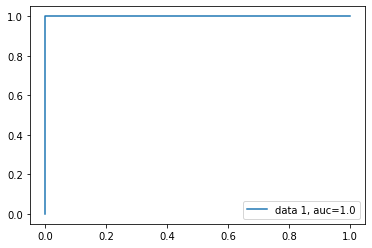

In [146]:
# NEW WITH Y_SCORE, [:,1] Specifies the column where true =1 and false =0
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score[:,1])
auc = metrics.roc_auc_score(y_test, y_score[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [94]:
# is this enough or do we need more labels? 
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AttributeError: predict_proba is not available when  probability=False

PRECISION RECALL

In [87]:
y_score = clf.decision_function(X_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

In [ ]:
import scikitplot as skplt


>>> from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

COMPUTING ROC AND PR¡¡¡¡¡ Actual answer belowwwwwwwwwww

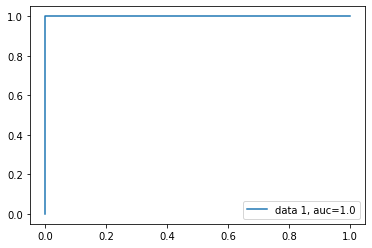

In [148]:
#ROC
# NEW WITH Y_SCORE, [:,1] Specifies the column where true =1 and false =0
#also imp to set svm probability to true while running classifier. 
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score[:,1])
auc = metrics.roc_auc_score(y_test, y_score[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

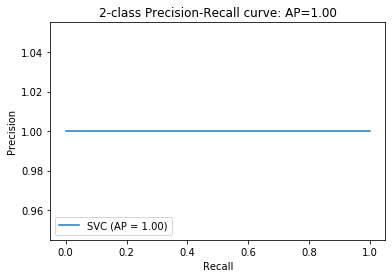

In [169]:
#PR curve, but this is a straight line instead of steps. 
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score[:,1])
average_precision
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [174]:
thresholds

array([0.845715  , 0.87598264, 0.93625075, 0.94245516])

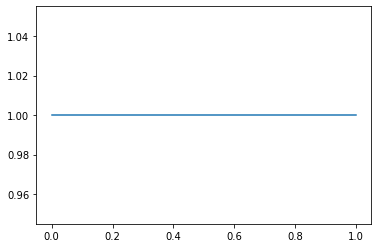

In [173]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
plt.step(recall, precision, label='Precision-Recall curve')

In [164]:
print()
print('precision',precision.shape)

precision (5,)


### B. Choose a threshold value for classification based on your results from 3a and construct a confusion matrix at this threshold.

In [92]:
>>> from sklearn.calibration import CalibratedClassifierCV
>>> svm = SVC()
>>> clf = CalibratedClassifierCV(svm)
>>> clf.fit(X_train, y_train)
>>> clf.predict_proba(X_test)


NameError: name 'SVC' is not defined

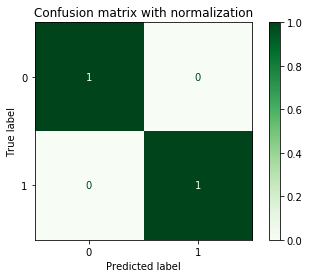

In [175]:
#### WORKING!!!!!!!!!!!!!!!!!!!!!!!!!!
#Confusion matrix with threshold setting
y_score = clf.predict_proba(X_test)
# 0.1 gives wrong values, and anything above it gives rt confusion matrix. 
new_labels = (y_score[:,0] >= 0.3)
b=list(new_labels)
#replacing all False with 0 for MG strain
# True, BW= 1 
th_y_test=[0 if x==True else 1 for x in b ]

disp = plot_confusion_matrix(clf, X_test, th_y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Greens,
                                 normalize='true')
disp.ax_.set_title('Confusion matrix with normalization')
plt.show()

In [137]:
y_score = clf.predict_proba(X_test)

#print('y_score', y_score)
new_labels = (y_score[:,0] >= 0.1)
b=list(new_labels)
#replacing all False with 0 for MG strain
# True, BW= 1 
th_y_test=[0 if x==True else 1 for x in b ]
print('y_test with threshold',th_y_test )
print('y_test',y_test)

y_test with threshold [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_test [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [126]:
#threshold sets a value to true and false. true=0, false =1 
new_labels = (y_score[:,0] >= 0.8)

print('new_labels',new_labels)
print('y_test',y_test)

new_labels [ True  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True]
y_test [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [129]:
#converting tupule to list. 
b=list(new_labels)
#replacing all False with 0 for MG strain
# True, BW= 1 
th_y_test=[0 if x==True else 1 for x in b ]
print('y_test with threshold',th_y_test )

y_test with threshold [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


#p = model.predict_proba(X_test) # you will have been using this list already
#y_score (instead of )
new_labels = (y_score >= THRESH)

In [31]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [80]:
print('y_test',y_test)
print('y_pred',y_pred)

y_test [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
y_pred [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [96]:
confusion_matrix(y_test, y_pred,labels=[0,1])

array([[21,  0],
       [ 0,  4]])

### C. Resampling

#### C.i. Perform bootstrapping on your data (100x) to calculate your confidence intervals for your 1c model performance and model coefficients.

In [ ]:
from sklearn.utils import resample

bs_train = resample(data.transpose(), n_samples = 80)
bs_train

#### C.ii. Perform 5-fold cross-validation (100x) to assess model overfitting.

In [ ]:
from sklearn.model_selection import KFold
'''
kf = KFold(n_splits=5, shuffle = True)
n_iter = 100

for i in range(n_iter): # 100 splits
    for train, test in kf.split(cv_data.transpose()): #5-fold cv
        
        #generate model
        # save output
        
        train_expvar
        test_expvar 
        '''
None

### D. Variable importance

#### D.i. Based on your bootstrapped models, which variables appear the most important at distinguishing between the strains MG1655 and BW25113?

#### D.ii. Take your top variable by importance and permute it (randomly shuffle it) - how is your model performance affected? Compare this to the performance change from permuting a variable not considered to be important in your model.